# 속성 데이터 분류 Template

# 데이터 준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
!wget https://raw.githubusercontent.com/dhrim/slipp_study_2022_DL_competition/master/material/data/car_classification.csv

--2022-05-22 12:33:35--  https://raw.githubusercontent.com/dhrim/slipp_study_2022_DL_competition/master/material/data/car_classification.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54766 (53K) [text/plain]
Saving to: ‘car_classification.csv’

car_classification. 100%[===================>]  53.48K  --.-KB/s    in 0.01s   

2022-05-22 12:33:35 (5.03 MB/s) - ‘car_classification.csv’ saved [54766/54766]



In [5]:
raw_data

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,class
0,-0.697747,1.482053,1.075915,0.663285,0.619748,-1.283618,-1.623241,0
1,-1.082115,1.482053,1.486832,1.572585,0.842258,-1.464852,-1.623241,0
2,-0.697747,1.482053,1.181033,1.182885,0.539692,-1.646086,-1.623241,0
3,-0.953992,1.482053,1.047246,1.182885,0.536160,-1.283618,-1.623241,0
4,-0.825870,1.482053,1.028134,0.923085,0.554997,-1.827320,-1.623241,0
...,...,...,...,...,...,...,...,...
387,0.455359,-0.862911,-0.519972,-0.479835,-0.220842,0.021267,1.634321,0
388,2.633448,-0.862911,-0.930889,-1.363154,-0.997859,3.283479,1.634321,1
389,1.095974,-0.862911,-0.567753,-0.531795,-0.803605,-1.428605,1.634321,0
390,0.583482,-0.862911,-0.711097,-0.661694,-0.415097,1.108671,1.634321,0


In [6]:
raw_data = pd.read_csv("car_classification.csv")
data = raw_data.to_numpy()
np.random.shuffle(data)

x = data[:,:7]
y = data[:,7]

split_index = int(len(x)*0.8)
train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [7]:
print(train_x[:5])
print(train_y[:5])

[[ 0.58348203 -0.86291079 -0.51997236 -0.37591457 -0.84010129 -0.01497955
  -1.35177741]
 [ 0.77566635 -0.86291079 -0.92133315 -0.94747438 -0.99197274  0.38373527
   0.54846706]
 [ 1.49315445 -0.86291079 -1.08378871 -1.15531431 -1.43345952  0.20250126
   1.36285755]
 [ 1.14722268 -0.86291079 -0.82577106 -0.76561444 -0.73885365  0.45622887
   1.36285755]
 [ 1.22409641 -0.86291079 -0.98822662 -1.33717425 -1.39225408  0.70995648
  -0.26592342]]
[0. 2. 2. 2. 2.]


In [9]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(313, 7)
(313,)
(79, 7)
(79,)


# Template

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                80        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 223
Trainable params: 223
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
3/3 [==============================] - 3s 90ms/step - loss: 1.3686 - acc: 0.2064 - val_loss: 1.2664 - val_acc: 0.0625
Epoch 2/1000
3/3 [==============================] - 0s 12ms/step - loss: 1.3367 - acc: 0.2206 - val_loss: 1.2445 - val_acc: 0.1250
Epoch 3/1000
3/3 [==============================] - 0s 11ms/

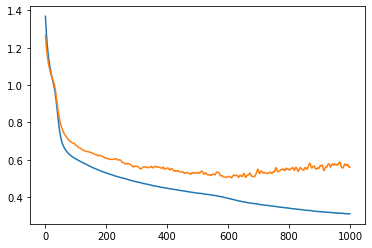

3/3 [==============================] - 0s 3ms/step - loss: 0.3395 - acc: 0.8608
loss= 0.33951663970947266
acc= 0.8607594966888428


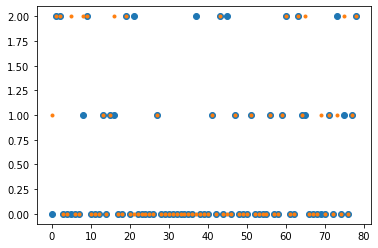

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense

model = keras.Sequential()
model.add(Dense(10, activation='relu', input_shape=(7,)))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation="softmax"))

model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["acc"])
model.summary()

history = model.fit(train_x, train_y, epochs=1000, verbose=1, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)



y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=-1)

plt.plot(test_y, "o")
plt.plot(predicted, ".")
plt.show()